# Welcome to python data mining course! 
# In this tutorial we will talk about data wrangling. We will use a practical  dataset to do learn the following topics: 

## 1) Cleaning data
#### 1. Filtering out noise
#### 2. Making data available for analysis
## 2) What is statistics?
####   Simple statistics
## 3)  Practical examples of data mining
## 4)  Dataset examples 


## Section 1.1 Data Cleaning

In [49]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt  

%matplotlib  inline 

In [50]:
df = pd.read_csv('single_family_home_values.csv') # zillow 

In [54]:
df.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.88802,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963


In [32]:
df.shape 

(15000, 19)

In [56]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
id                 15000 non-null int64
address            15000 non-null object
city               15000 non-null object
state              15000 non-null object
zipcode            15000 non-null int64
latitude           14985 non-null float64
longitude          14985 non-null float64
bedrooms           15000 non-null int64
bathrooms          15000 non-null float64
rooms              15000 non-null int64
squareFootage      15000 non-null int64
lotSize            15000 non-null int64
yearBuilt          14999 non-null float64
lastSaleDate       15000 non-null object
lastSaleAmount     15000 non-null int64
priorSaleDate      11173 non-null object
priorSaleAmount    11287 non-null float64
estimated_value    15000 non-null int64
dtypes: float64(5), int64(8), object(5)
memory usage: 2.1+ MB


In [57]:
df.describe()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.500000e+04,15000.000000,14985.000000,14985.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,14999.000000,1.500000e+04,1.128700e+04,1.500000e+04
mean,5.176229e+07,80204.919467,39.740538,-104.964076,2.708400,2.195067,6.164133,1514.504400,5820.76620,1929.517168,4.053563e+05,2.594350e+05,6.371625e+05
std,6.190876e+07,9.715263,0.023555,0.039788,0.897231,1.166279,1.958601,830.635999,3013.27947,29.937051,7.756998e+05,3.379387e+05,5.044185e+05
min,1.433670e+05,80022.000000,39.614531,-105.108440,0.000000,0.000000,0.000000,350.000000,278.00000,1874.000000,2.590000e+02,0.000000e+00,1.477670e+05
25%,1.004802e+07,80205.000000,39.727634,-104.978737,2.000000,1.000000,5.000000,986.000000,4620.00000,1907.000000,1.940000e+05,1.100000e+05,3.984348e+05
50%,2.563241e+07,80206.000000,39.748048,-104.957689,3.000000,2.000000,6.000000,1267.500000,5950.00000,1925.000000,3.200000e+05,2.100000e+05,5.183575e+05
75%,5.114222e+07,80207.000000,39.758214,-104.937522,3.000000,3.000000,7.000000,1766.250000,6270.00000,1949.000000,4.632000e+05,3.302400e+05,6.879692e+05
max,3.209481e+08,80209.000000,39.888020,-104.830930,15.000000,12.000000,39.000000,10907.000000,122839.00000,2016.000000,4.560000e+07,1.600000e+07,1.014531e+07


In [58]:
df2= df.fillna(0)

In [31]:
#or 
df = df.fillna(df.mean()) 

In [63]:
df.dropna(inplace=True) 

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11078 entries, 0 to 14999
Data columns (total 18 columns):
id                 11078 non-null int64
address            11078 non-null object
city               11078 non-null object
state              11078 non-null object
zipcode            11078 non-null int64
latitude           11078 non-null float64
longitude          11078 non-null float64
bedrooms           11078 non-null int64
bathrooms          11078 non-null float64
rooms              11078 non-null int64
squareFootage      11078 non-null int64
lotSize            11078 non-null int64
yearBuilt          11078 non-null float64
lastSaleDate       11078 non-null object
lastSaleAmount     11078 non-null int64
priorSaleDate      11078 non-null object
priorSaleAmount    11078 non-null float64
estimated_value    11078 non-null int64
dtypes: float64(5), int64(8), object(5)
memory usage: 1.6+ MB


In [72]:
df[['estimated_value', 'yearBuilt', 'priorSaleAmount']].head(2)

,estimated_value,yearBuilt,priorSaleAmount
0,239753,2003.0,165700.0
3,494073,1956.0,0.0


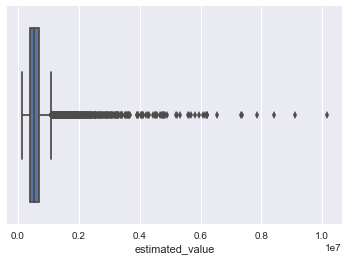

In [65]:
sns.boxplot(df.estimated_value)

In [81]:
df=df[df.estimated_value<=1000000] 

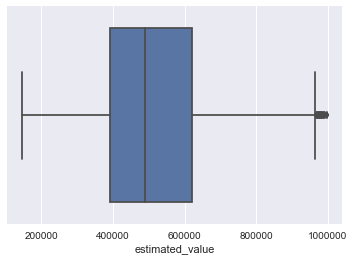

In [83]:
sns.boxplot(df.estimated_value)

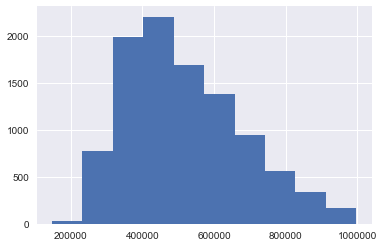

In [84]:
df.estimated_value.hist()

In [86]:
df.zipcode.unique()

array([80022, 80033, 80123, 80203, 80204, 80205, 80206, 80207, 80209])

In [92]:
#filter out noise, slice df

df[(df.estimated_value<=1000000)  &  (df.yearBuilt>2013) &  (df.zipcode==80209)] 

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
13276,39512040,764 S York St,Denver,CO,80209,39.702607,-104.960243,3,4.0,7,2567,6250,2016.0,2012-07-23,420000,2010-11-29,385000.0,770622
13316,11586398,450 S Vine St,Denver,CO,80209,39.708351,-104.962546,3,5.0,7,2570,4680,2016.0,2015-02-11,571000,2007-01-03,399000.0,682810
13428,11586742,636 S Williams St,Denver,CO,80209,39.704969,-104.966025,3,5.0,6,2578,4680,2016.0,2015-07-22,637600,2007-02-02,481900.0,745777
13431,184305844,456 S High St,Denver,CO,80209,39.708197,-104.964857,3,5.0,10,3346,6240,2016.0,2016-01-11,725000,1993-07-15,124000.0,751361
13766,7652681,408 S Franklin St,Denver,CO,80209,39.709074,-104.968369,3,5.0,8,3367,5060,2015.0,2014-04-21,513486,2007-08-22,435000.0,709102
13812,39708952,611 S Washington St,Denver,CO,80209,39.705403,-104.979580,3,4.0,10,2090,4690,2014.0,2015-03-09,825000,2013-07-19,325500.0,994114
14162,30566405,876 S Williams St,Denver,CO,80209,39.700646,-104.966016,3,1.0,8,3394,6250,2015.0,2014-03-18,675000,2006-05-11,511000.0,869769
14982,43208991,731 S Elizabeth St,Denver,CO,80209,39.703135,-104.956141,2,3.0,6,2680,6160,2016.0,2015-03-31,485000,2003-06-19,357500.0,753935


## What is statistics?

In [33]:
df.describe() 

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04
mean,5.176229e+07,80204.919467,39.700798,-104.859112,2.708400,2.195067,6.164133,1514.504400,5820.76620,1929.388533,4.053563e+05,1.952162e+05,6.371625e+05
std,6.190876e+07,9.715263,1.256340,3.317944,0.897231,1.166279,1.958601,830.635999,3013.27947,33.828534,7.756998e+05,3.137979e+05,5.044185e+05
min,1.433670e+05,80022.000000,0.000000,-105.108440,0.000000,0.000000,0.000000,350.000000,278.00000,0.000000,2.590000e+02,0.000000e+00,1.477670e+05
25%,1.004802e+07,80205.000000,39.727609,-104.978652,2.000000,1.000000,5.000000,986.000000,4620.00000,1907.000000,1.940000e+05,0.000000e+00,3.984348e+05
50%,2.563241e+07,80206.000000,39.748027,-104.957680,3.000000,2.000000,6.000000,1267.500000,5950.00000,1925.000000,3.200000e+05,1.475000e+05,5.183575e+05
75%,5.114222e+07,80207.000000,39.758177,-104.937504,3.000000,3.000000,7.000000,1766.250000,6270.00000,1949.000000,4.632000e+05,2.859250e+05,6.879692e+05
max,3.209481e+08,80209.000000,39.888020,0.000000,15.000000,12.000000,39.000000,10907.000000,122839.00000,2016.000000,4.560000e+07,1.600000e+07,1.014531e+07


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
id                 15000 non-null int64
address            15000 non-null object
city               15000 non-null object
state              15000 non-null object
zipcode            15000 non-null int64
latitude           15000 non-null float64
longitude          15000 non-null float64
bedrooms           15000 non-null int64
bathrooms          15000 non-null float64
rooms              15000 non-null int64
squareFootage      15000 non-null int64
lotSize            15000 non-null int64
yearBuilt          15000 non-null float64
lastSaleDate       15000 non-null datetime64[ns]
lastSaleAmount     15000 non-null int64
priorSaleDate      15000 non-null object
priorSaleAmount    15000 non-null float64
estimated_value    15000 non-null int64
yearBuild          15000 non-null object
dtypes: datetime64[ns](1), float64(5), int64(8), object(5)
memory usage: 2.2+ MB


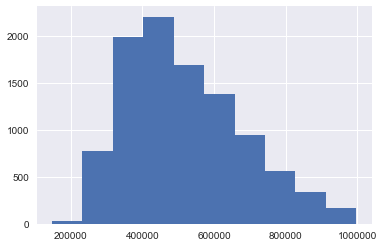

In [93]:
df.estimated_value.hist()

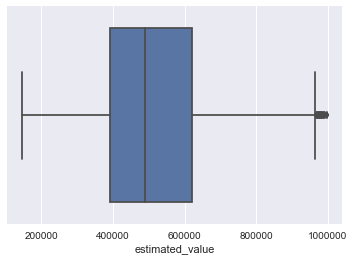

In [94]:
sns.boxplot(df.estimated_value)

In [97]:
df= df[df.lastSaleAmount<=1000000]

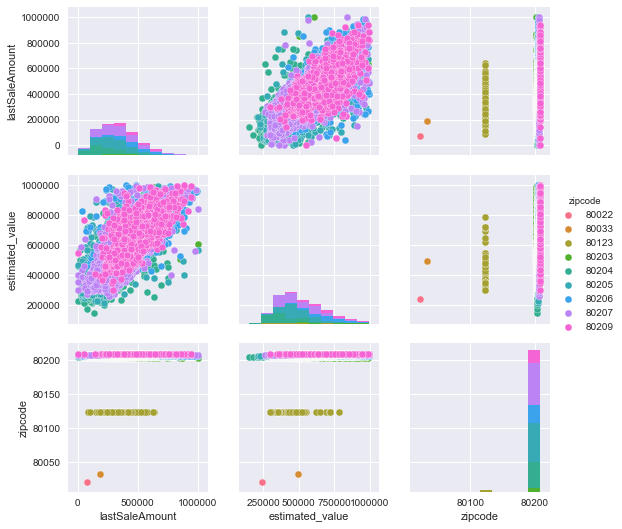

In [98]:
sns.pairplot(df[['lastSaleAmount', 'estimated_value', 'zipcode']], hue='zipcode')

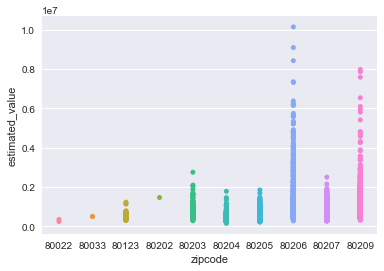

In [26]:
sns.stripplot(x=df.zipcode, y=df.estimated_value)

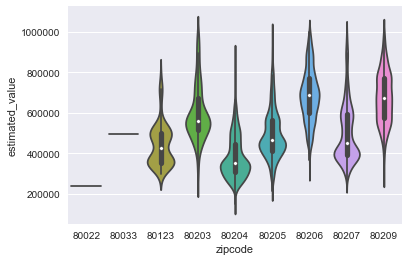

In [99]:
sns.violinplot(x=df.zipcode, y=df.estimated_value)

In [17]:
#df['yearBuild']=df.yearBuilt.astype(str)

In [104]:
df['priorSaleDate'] = pd.to_datetime(df.priorSaleDate) 

In [105]:
df['lastSaleDate'] = pd.to_datetime(df.lastSaleDate) 

In [116]:
df['weekday_lastSaleDate'] = df.lastSaleDate.dt.weekday
df['year_lastSaleDate'] = df.lastSaleDate.dt.year

In [117]:
df['weekday_priorSaleDate'] = df.priorSaleDate.dt.weekday
df['year_priorSaleDate'] = df.priorSaleDate.dt.year

In [119]:
df['year_between_last_sales']=df.year_lastSaleDate-df.year_priorSaleDate

In [125]:
df.corr().loc[ 'estimated_value' , : ].sort_values(ascending=False)

estimated_value            1.000000
lastSaleAmount             0.771199
squareFootage              0.690419
bathrooms                  0.651712
rooms                      0.582055
priorSaleAmount            0.570242
bedrooms                   0.358081
longitude                  0.234486
id                         0.151873
zipcode                    0.109777
year_between_last_sales    0.088621
year_lastSaleDate          0.040228
weekday_lastSaleDate       0.001672
weekday_priorSaleDate     -0.014823
year_priorSaleDate        -0.059596
lotSize                   -0.074329
latitude                  -0.199264
yearBuilt                 -0.257927
new_col                         NaN
Name: estimated_value, dtype: float64

## 3) Practical examples of data mining

In [136]:
#Group by 
df2= df.groupby('zipcode').estimated_value.median().reset_index()

In [141]:
df2.columns=['zipcode', 'median_value']

In [143]:
df2

,zipcode,median_value
0,80022,239753.0
1,80033,494073.0
2,80123,427234.5
3,80203,560032.0
4,80204,352036.5
5,80205,465961.0
6,80206,685462.0
7,80207,451622.0
8,80209,674813.0


In [ ]:
# merge df 

In [45]:
#pd.merge(df, df2, on='zipcode')

In [144]:
df.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,...,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,new_col,weekday_lastSaleDate,year_lastSaleDate,weekday_priorSaleDate,year_priorSaleDate,year_between_last_sales
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,...,75000,2004-05-13,165700.0,239753,1,3,2009,3,2004,5
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.76078,-105.081060,4,3.0,0,...,185000,2008-06-27,0.0,494073,1,1,2008,4,2008,0


In [145]:
df3 = pd.merge(df, df2, on='zipcode', how='left')

In [146]:
df3.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,...,priorSaleDate,priorSaleAmount,estimated_value,new_col,weekday_lastSaleDate,year_lastSaleDate,weekday_priorSaleDate,year_priorSaleDate,year_between_last_sales,median_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,...,2004-05-13,165700.0,239753,1,3,2009,3,2004,5,239753.0
1,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.76078,-105.081060,4,3.0,0,...,2008-06-27,0.0,494073,1,1,2008,4,2008,0,494073.0


## 4)  Dataset examples 

### Kaggle: https://www.kaggle.com
### Reddit: 
### Sklearn 
### Google! 

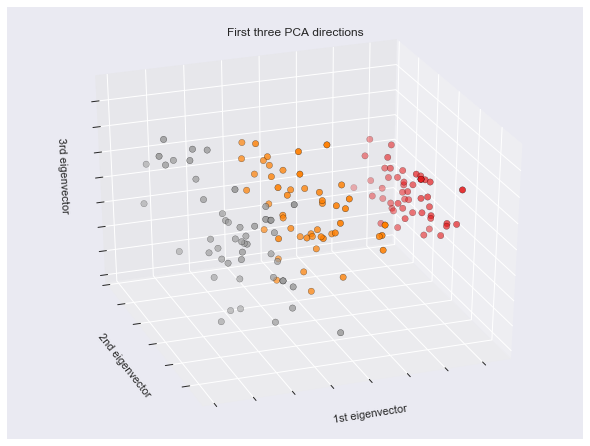

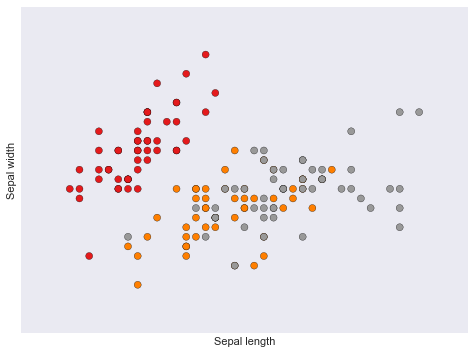

In [28]:
# From http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html 
# Code source: Gaël Varoquaux 
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets 
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# Python Installations

## 1) Install Anaconda 
https://www.anaconda.com/download/

## 2) Install Jupyter Notebook 
https://jupyter.org/install

## 3) To launch Notebook 
### In your terminal, enter
### jupyter notebook 

## 4) Install Python Libraries
### Conda install pandas 
### Conda install numpy 